Datatrained
Evaluation Project - 4
Doctor's Consultation Fees Prediction
Problem Statement:
Predict A Doctor's Consultation Fee 



We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

Size of training set: 5961 records

Size of test set: 1987 records



FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('Final_Train.xlsx')
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [3]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [5]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [6]:
df["Rating"].value_counts()

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
92%      66
90%      66
91%      60
89%      42
88%      41
85%      27
82%      23
86%      21
83%      21
80%      19
77%      16
87%      14
79%      13
84%      13
81%      12
67%      12
76%       9
71%       9
73%       8
75%       8
60%       7
74%       7
78%       6
68%       5
56%       5
69%       4
70%       4
57%       3
72%       3
63%       2
33%       2
55%       2
62%       2
64%       2
48%       1
7%        1
36%       1
45%       1
40%       1
58%       1
53%       1
47%       1
65%       1
Name: Rating, dtype: int64

In [7]:
df["Experience"].value_counts()

9 years experience     323
10 years experience    294
11 years experience    288
8 years experience     282
12 years experience    279
                      ... 
60 years experience      1
59 years experience      1
58 years experience      1
61 years experience      1
64 years experience      1
Name: Experience, Length: 64, dtype: int64

In [8]:
df['Place'].value_counts()

HSR Layout, Bangalore       75
Andheri West, Mumbai        70
Dwarka, Delhi               67
Banjara Hills, Hyderabad    64
Mulund West, Mumbai         54
                            ..
Surya Niketan, Delhi         1
Ram Nagar, Hyderabad         1
Rohini Sector 15, Delhi      1
Moula Ali, Hyderabad         1
Lodhi Colony, Delhi          1
Name: Place, Length: 877, dtype: int64

In [9]:
df["Qualification"].value_counts()

BDS                                                                               488
BHMS                                                                              477
BAMS                                                                              471
MBBS                                                                              334
MBBS, MS - ENT                                                                    220
                                                                                 ... 
MBBS, MRCP (UK), CCT - Dermatology, Diploma in ABLS (USA)                           1
MBBS, MD - Ophthalmology                                                            1
BHMS, Diploma in Acupressure Therapy                                                1
MBBS, MD - Dermatology , Venereology & Leprosy, Diploma in Medical Cosmetology      1
MBBS, MS - ENT, FCPS - Oto-Rhino-Laryngology                                        1
Name: Qualification, Length: 1420, dtype: int64

In [10]:
split_Qualification=df['Qualification'].str.split(', ',n=1,expand=True).rename(columns={0:'Doctor_Education',1:'waste'})
split_Qualification

,Doctor_Education,waste
0,BHMS,MD - Homeopathy
1,BAMS,MD - Ayurveda Medicine
2,MBBS,MS - Otorhinolaryngology
3,BSc - Zoology,BAMS
4,BAMS,None
...,...,...
5956,MBBS,MS - ENT
5957,MBBS,None
5958,MBBS,None
5959,MBBS,MD - General Medicine


In [11]:
split_Experience=df['Experience'].str.split(' ',n=1,expand=True).rename(columns={0:'Experienced',1:'waste1'})
split_Experience

,Experienced,waste1
0,24,years experience
1,12,years experience
2,9,years experience
3,12,years experience
4,20,years experience
...,...,...
5956,19,years experience
5957,33,years experience
5958,41,years experience
5959,15,years experience


In [12]:
split_Place=df['Place'].str.split(', ',n=2,expand=True).rename(columns={0:'sector',1:'Location',2:'None'})
split_Place

,sector,Location,None
0,Kakkanad,Ernakulam,None
1,Whitefield,Bangalore,None
2,Mathikere - BEL,Bangalore,None
3,Bannerghatta Road,Bangalore,None
4,Keelkattalai,Chennai,None
...,...,...,...
5956,Basavanagudi,Bangalore,None
5957,Nungambakkam,Chennai,None
5958,Greater Kailash Part 2,Delhi,None
5959,Vileparle West,Mumbai,None


In [13]:
df=pd.concat([df,split_Experience,split_Qualification,split_Place],axis=1)
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Experienced,waste1,Doctor_Education,waste,sector,Location,None
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24,years experience,BHMS,MD - Homeopathy,Kakkanad,Ernakulam,None
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,years experience,BAMS,MD - Ayurveda Medicine,Whitefield,Bangalore,None
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9,years experience,MBBS,MS - Otorhinolaryngology,Mathikere - BEL,Bangalore,None
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,years experience,BSc - Zoology,BAMS,Bannerghatta Road,Bangalore,None
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20,years experience,BAMS,None,Keelkattalai,Chennai,None


In [14]:
df=df.drop(['Experience','Qualification','waste1','waste','Miscellaneous_Info','Place','sector','None'],axis=1,inplace=False)

In [15]:
df

,Rating,Profile,Fees,Experienced,Doctor_Education,Location
0,100%,Homeopath,100,24,BHMS,Ernakulam
1,98%,Ayurveda,350,12,BAMS,Bangalore
2,NaN,ENT Specialist,300,9,MBBS,Bangalore
3,NaN,Ayurveda,250,12,BSc - Zoology,Bangalore
4,100%,Ayurveda,250,20,BAMS,Chennai
...,...,...,...,...,...,...
5956,98%,ENT Specialist,300,19,MBBS,Bangalore
5957,NaN,General Medicine,100,33,MBBS,Chennai
5958,97%,General Medicine,600,41,MBBS,Delhi
5959,90%,General Medicine,100,15,MBBS,Mumbai


In [16]:
df['Rating']=df['Rating'].fillna(df['Rating'].mode()[0])
df['Location']=df['Location'].fillna(df['Location'].mode()[0])

In [17]:
df

,Rating,Profile,Fees,Experienced,Doctor_Education,Location
0,100%,Homeopath,100,24,BHMS,Ernakulam
1,98%,Ayurveda,350,12,BAMS,Bangalore
2,100%,ENT Specialist,300,9,MBBS,Bangalore
3,100%,Ayurveda,250,12,BSc - Zoology,Bangalore
4,100%,Ayurveda,250,20,BAMS,Chennai
...,...,...,...,...,...,...
5956,98%,ENT Specialist,300,19,MBBS,Bangalore
5957,100%,General Medicine,100,33,MBBS,Chennai
5958,97%,General Medicine,600,41,MBBS,Delhi
5959,90%,General Medicine,100,15,MBBS,Mumbai


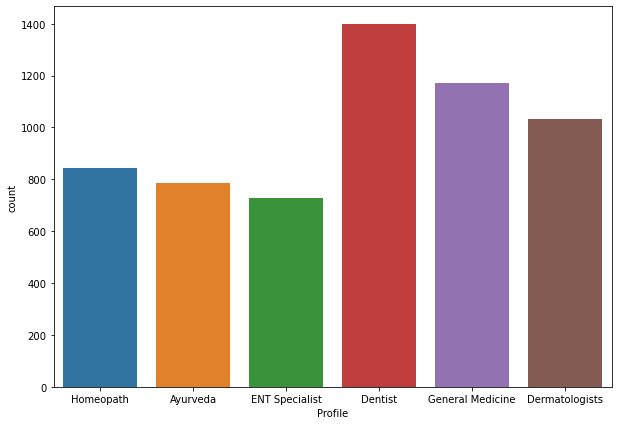

In [18]:
plt.figure(figsize=(10,7))
sns.countplot(df['Profile'])

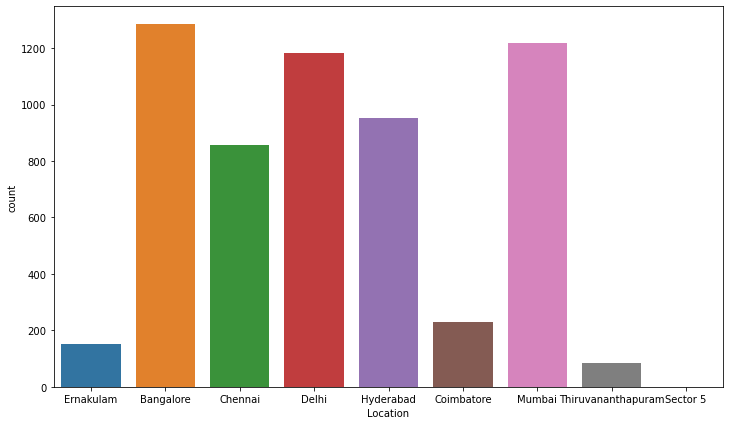

In [19]:
plt.figure(figsize=(12,7))
sns.countplot(df['Location'])

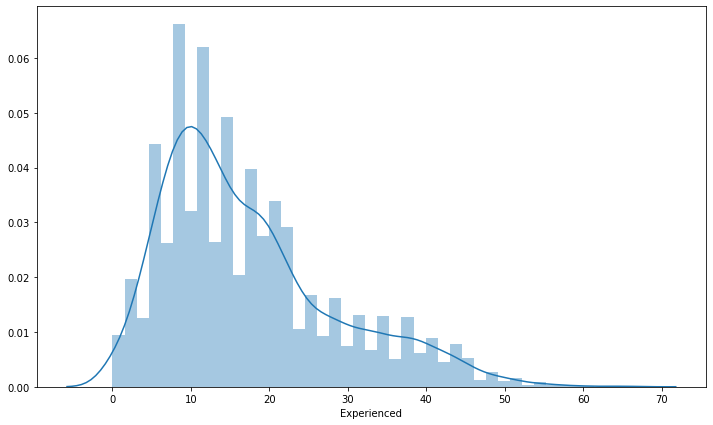

In [20]:
plt.figure(figsize=(12,7))
sns.distplot(df['Experienced'])

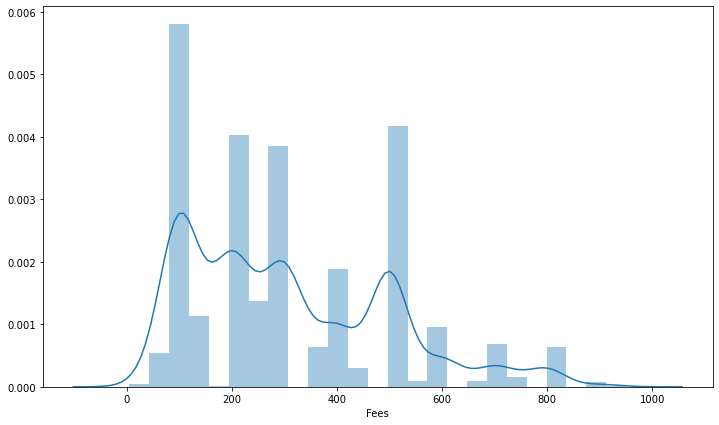

In [21]:
plt.figure(figsize=(12,7))
sns.distplot(df['Fees'])

In [22]:
df['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [23]:
df['Profile']=df['Profile'].replace('Dentist','6')
df['Profile']=df['Profile'].replace('General Medicine','5')
df['Profile']=df['Profile'].replace('Dermatologists','4')
df['Profile']=df['Profile'].replace('Homeopath','3')
df['Profile']=df['Profile'].replace('Ayurveda','2')
df['Profile']=df['Profile'].replace('ENT Specialist','1')

Dentist              6

General Medicine     5

Dermatologists       4

Homeopath            3

Ayurveda             2

ENT Specialist       1

In [24]:
df

,Rating,Profile,Fees,Experienced,Doctor_Education,Location
0,100%,3,100,24,BHMS,Ernakulam
1,98%,2,350,12,BAMS,Bangalore
2,100%,1,300,9,MBBS,Bangalore
3,100%,2,250,12,BSc - Zoology,Bangalore
4,100%,2,250,20,BAMS,Chennai
...,...,...,...,...,...,...
5956,98%,1,300,19,MBBS,Bangalore
5957,100%,5,100,33,MBBS,Chennai
5958,97%,5,600,41,MBBS,Delhi
5959,90%,5,100,15,MBBS,Mumbai


In [25]:
df['Doctor_Education'].value_counts()

MBBS                                    2448
BDS                                     1208
BAMS                                     711
BHMS                                     706
MD - Dermatology                          84
                                        ... 
B.Ac                                       1
DM - Cardiology                            1
DNB - Orthopedics/Orthopedic Surgery       1
MD AYURVED AND YOG                         1
FRGUHS                                     1
Name: Doctor_Education, Length: 151, dtype: int64

In [26]:
split_Rating=df['Rating'].str.split('%',n=1,expand=True).rename(columns={0:'Ratings',1:'percentage'})
split_Rating

,Ratings,percentage
0,100,
1,98,
2,100,
3,100,
4,100,
...,...,...
5956,98,
5957,100,
5958,97,
5959,90,


In [27]:
df=pd.concat([df,split_Rating],axis=1)
df.head()

,Rating,Profile,Fees,Experienced,Doctor_Education,Location,Ratings,percentage
0,100%,3,100,24,BHMS,Ernakulam,100,
1,98%,2,350,12,BAMS,Bangalore,98,
2,100%,1,300,9,MBBS,Bangalore,100,
3,100%,2,250,12,BSc - Zoology,Bangalore,100,
4,100%,2,250,20,BAMS,Chennai,100,


In [28]:
df=df.drop(['Rating','percentage'],axis=1,inplace=False)

In [29]:
df

,Profile,Fees,Experienced,Doctor_Education,Location,Ratings
0,3,100,24,BHMS,Ernakulam,100
1,2,350,12,BAMS,Bangalore,98
2,1,300,9,MBBS,Bangalore,100
3,2,250,12,BSc - Zoology,Bangalore,100
4,2,250,20,BAMS,Chennai,100
...,...,...,...,...,...,...
5956,1,300,19,MBBS,Bangalore,98
5957,5,100,33,MBBS,Chennai,100
5958,5,600,41,MBBS,Delhi,97
5959,5,100,15,MBBS,Mumbai,90


In [30]:
df['Location'].value_counts()

Bangalore             1284
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Sector 5                 1
Name: Location, dtype: int64

Bangalore--------------->                9

Mumbai------------------>                8 

Delhi------------------->                7

Hyderabad--------------->                6

Chennai----------------->                5

Coimbatore-------------->                4

Ernakulam--------------->                3

Thiruvananthapuram------>                2 

Sector 5---------------->                1

In [31]:
df['Location']=df['Location'].replace('Bangalore','9')
df['Location']=df['Location'].replace('Mumbai','8')
df['Location']=df['Location'].replace('Delhi','7')
df['Location']=df['Location'].replace('Hyderabad','6')
df['Location']=df['Location'].replace('Chennai','5')
df['Location']=df['Location'].replace('Coimbatore','4')
df['Location']=df['Location'].replace('Ernakulam','3')
df['Location']=df['Location'].replace('Thiruvananthapuram','2')
df['Location']=df['Location'].replace('Sector 5','1')

In [32]:
df

,Profile,Fees,Experienced,Doctor_Education,Location,Ratings
0,3,100,24,BHMS,3,100
1,2,350,12,BAMS,9,98
2,1,300,9,MBBS,9,100
3,2,250,12,BSc - Zoology,9,100
4,2,250,20,BAMS,5,100
...,...,...,...,...,...,...
5956,1,300,19,MBBS,9,98
5957,5,100,33,MBBS,5,100
5958,5,600,41,MBBS,7,97
5959,5,100,15,MBBS,8,90


In [33]:
df['Doctor_Education'].value_counts()

MBBS                                    2448
BDS                                     1208
BAMS                                     711
BHMS                                     706
MD - Dermatology                          84
                                        ... 
B.Ac                                       1
DM - Cardiology                            1
DNB - Orthopedics/Orthopedic Surgery       1
MD AYURVED AND YOG                         1
FRGUHS                                     1
Name: Doctor_Education, Length: 151, dtype: int64

In [34]:
split_Doctor_Education=df['Doctor_Education'].str.split(' ',n=6,expand=True).rename(columns={0:'Qualification',1:'waste1',2:'waste2',3:'waste3',4:'waste4',5:'waste5',6:'waste6'})
split_Doctor_Education

,Qualification,waste1,waste2,waste3,waste4,waste5,waste6
0,BHMS,None,None,None,None,None,None
1,BAMS,None,None,None,None,None,None
2,MBBS,None,None,None,None,None,None
3,BSc,-,Zoology,None,None,None,None
4,BAMS,None,None,None,None,None,None
...,...,...,...,...,...,...,...
5956,MBBS,None,None,None,None,None,None
5957,MBBS,None,None,None,None,None,None
5958,MBBS,None,None,None,None,None,None
5959,MBBS,None,None,None,None,None,None


In [35]:
df=pd.concat([df,split_Doctor_Education],axis=1)
df.head()

,Profile,Fees,Experienced,Doctor_Education,Location,Ratings,Qualification,waste1,waste2,waste3,waste4,waste5,waste6
0,3,100,24,BHMS,3,100,BHMS,None,None,None,None,None,None
1,2,350,12,BAMS,9,98,BAMS,None,None,None,None,None,None
2,1,300,9,MBBS,9,100,MBBS,None,None,None,None,None,None
3,2,250,12,BSc - Zoology,9,100,BSc,-,Zoology,None,None,None,None
4,2,250,20,BAMS,5,100,BAMS,None,None,None,None,None,None


In [36]:
df=df.drop(['waste1','waste2','waste3','waste4','waste5','waste6','Doctor_Education'],axis=1,inplace=False)

In [37]:
df

,Profile,Fees,Experienced,Location,Ratings,Qualification
0,3,100,24,3,100,BHMS
1,2,350,12,9,98,BAMS
2,1,300,9,9,100,MBBS
3,2,250,12,9,100,BSc
4,2,250,20,5,100,BAMS
...,...,...,...,...,...,...
5956,1,300,19,9,98,MBBS
5957,5,100,33,5,100,MBBS
5958,5,600,41,7,97,MBBS
5959,5,100,15,8,90,MBBS


There is more number of catorigal label in the qualification row so we are mapping tat

In [38]:
df['Qualification'].value_counts().to_dict()

{'MBBS': 2448,
 'BDS': 1208,
 'BAMS': 711,
 'BHMS': 706,
 'MD': 327,
 'MDS': 164,
 'MS': 110,
 'DNB': 45,
 'DHMS': 36,
 'Diploma': 24,
 'Get': 24,
 'DDVL': 20,
 'LCEH': 14,
 'Fellowship': 10,
 'B.Sc': 9,
 'PhD': 8,
 'Post': 7,
 'BSAM': 6,
 'DVD': 5,
 'DDV': 5,
 'BSc': 4,
 'DM': 3,
 'Certification': 3,
 'G.A.M.S': 3,
 'MRCP': 3,
 'MRCPS': 2,
 'FRCS': 2,
 'MDS-Oral': 2,
 'GCEH': 2,
 'FCPS': 2,
 'BEMS': 2,
 'Certificate': 2,
 'MPH': 2,
 'MRCS': 2,
 'MSc': 2,
 'M.Ch': 1,
 'M.': 1,
 'MD-DVL': 1,
 'BUMS': 1,
 'PG': 1,
 'FAGE': 1,
 'Certified': 1,
 'M.D.': 1,
 'MBA': 1,
 'Masters': 1,
 'Doctor': 1,
 'FFDRCSI': 1,
 'Advanced': 1,
 'MA': 1,
 'Training': 1,
 'Member': 1,
 'MRCGP': 1,
 'Diplomate': 1,
 'FRCP': 1,
 'FNB': 1,
 'DNHE': 1,
 '39': 1,
 'MRCPCH': 1,
 'POST': 1,
 'M.Sc': 1,
 'B.Ac': 1,
 'Cochlear': 1,
 'FRGUHS': 1,
 'BIMS': 1,
 'Ayurvedic': 1,
 'Graduate': 1,
 'CGO': 1,
 'DGO': 1,
 'PGD': 1,
 'Doctorate': 1,
 'MDS-': 1,
 'D.H.M': 1,
 'PDCC': 1}

In [39]:
qualification_map=df['Qualification'].value_counts().to_dict()

In [40]:
df['Qualification']=df['Qualification'].map(qualification_map)
df.head(20)

,Profile,Fees,Experienced,Location,Ratings,Qualification
0,3,100,24,3,100,706
1,2,350,12,9,98,711
2,1,300,9,9,100,2448
3,2,250,12,9,100,4
4,2,250,20,5,100,711
5,2,100,8,5,100,711
6,3,200,42,7,100,706
7,6,200,10,9,99,1208
8,5,100,14,6,100,2448
9,6,100,23,3,100,4


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Profile        5961 non-null   object
 1   Fees           5961 non-null   int64 
 2   Experienced    5961 non-null   object
 3   Location       5961 non-null   object
 4   Ratings        5961 non-null   object
 5   Qualification  5961 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 279.5+ KB


FINALLY WE CONVERTED ALL CATAGORICAL VARIABLES INTO A NUMERIC FORM

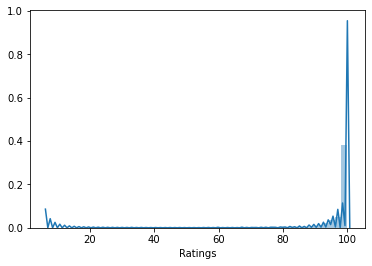

In [42]:
sns.distplot(df['Ratings'])

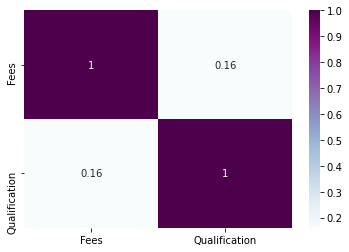

In [43]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='BuPu')

In [44]:
df.head()

,Profile,Fees,Experienced,Location,Ratings,Qualification
0,3,100,24,3,100,706
1,2,350,12,9,98,711
2,1,300,9,9,100,2448
3,2,250,12,9,100,4
4,2,250,20,5,100,711


# Train Test Split

In [45]:
x=df.drop(columns=['Fees'],axis=1)
y=df['Fees']

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=34)

# Model Training

In [58]:
#classify function
from sklearn.model_selection import cross_val_score
def classify(model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
    model.fit(x_train,y_train)
    print('Accuracy is',model.score(x_test,y_test)*100)
    #cross validation -it is used for better validation of model
    #eg: cv=5,train-4,test-1
    score=cross_val_score(model,x,y,cv=5)
    print('Cross validation is,',np.mean(score)*100)
    

In [59]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model,x,y)

Accuracy is 21.32796780684105
Cross validation is, 21.69103045168404


In [60]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model,x,y)

Accuracy is 20.92555331991952
Cross validation is, 22.39571437411748


In [61]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model,x,y)

Accuracy is 23.74245472837022
Cross validation is, 23.217552613961754


In [62]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
classify(model,x,y)

Accuracy is 22.602280348759223
Cross validation is, 23.234303009164194


# Hyper Parameter Turning

In [63]:
model=RandomForestClassifier(n_estimators=100,min_samples_split=25,max_depth=7,max_features=1)
classify(model,x,y)

Accuracy is 28.772635814889334
Cross validation is, 28.837260979877026


# Confusion Matrix

In [64]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [65]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   1,   0,   0,   0,   9,   0,   0,   2,   0,   1,   0,   0,
          0,   3,   0,   1,   0,   4,   0,   1,   0,   0,   0,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,
          0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   1,   0,   0,   0,   3,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   6,   0,   2,   3, 130,   0,  14,  64,   0,  10,   0,   0,
          0,  32,   1,   9,   0,  39,   0,   7,   0,   0,  10,   0,   8,
          0,   4],
       [  

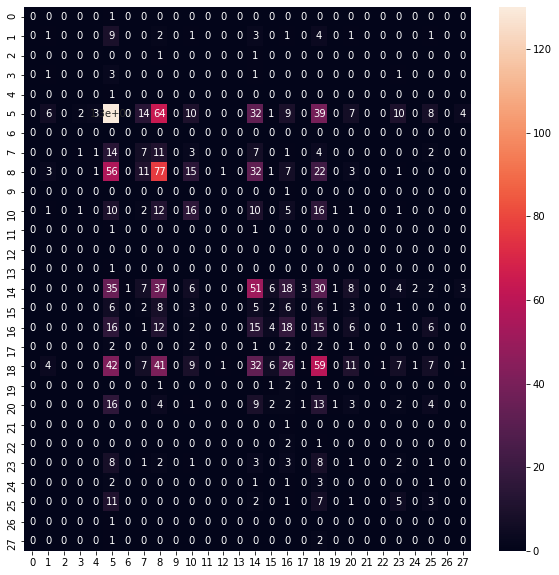

In [66]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

# Model Saving

In [67]:
import pickle
filename = 'Final_Train.pkl'
pickle.dump(model,open(filename,'wb'))